# Point and Local Operators - Exercises Solutions
## Computer Vision and Image Processing - Lab Session 4
### Prof: Luigi Di Stefano, luigi.distefano@unibo.it
### Tutor: Pierluigi Zama Ramirez, pierluigi.zama@unibo.it

# Point Operator

## Exercise 1: Linear Contrast Stretching
Implement a linear contrast stretching function.

Given $P_{max}$ and $P_{min}$ the maximum and minimum pixel value respectively (can be different from the min and max values of the image), convert each pixel of the original image $P_{in}$ into the new pixel of the output image $P_{out}$ with the following formula:

$P_{out} = \frac{255}{P_{max} - P_{min}}(P_{in} - P_{min})$

Test the function 3 times on the __grayscale__ image "ex/image.png" using as $P_{max}$ and $P_{min}$:

* The minimum and maximum value of the image  respectively. You can use **np.max(array, axis)** and **np.min(array, axis)** to calculate them. 
* $P_{max}=40$ and $P_{min}=0$.
* Choose as $P_{max}$ and $P_{min}$ the values at 95% and 5% percentiles of the distribution respectively (the value of the 5% pixels ordered from the lowest value pixel). 

Plot the histogram of the image before and after each transformation.

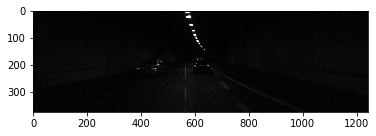

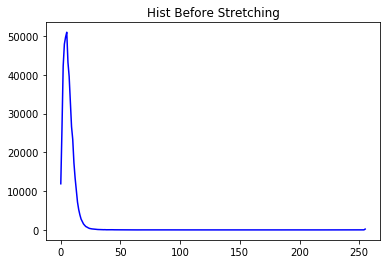

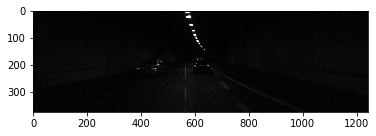

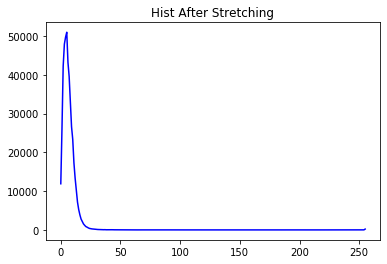

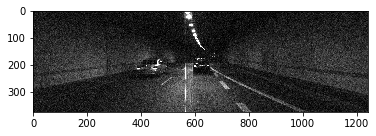

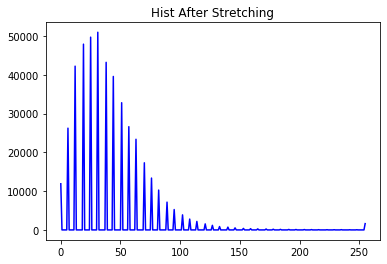

Max 95%:  15  Min 5%:  2


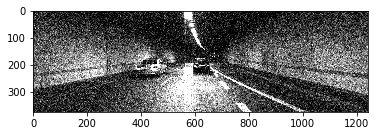

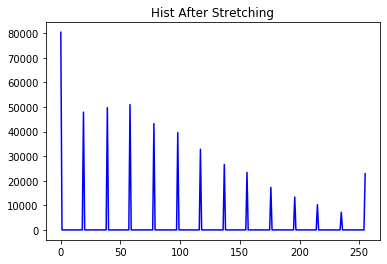

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def linear_stretching(img, max_value, min_value):
    img[img<min_value] = min_value
    img[img>max_value] = max_value
    linear_stretched_img = 255./(max_value-min_value)*(img-min_value)
    return linear_stretched_img


def find_percentile_value(hist, percentile):
    s = 0
    idx = 0
    total_pixel = np.sum(hist)
    while(s < total_pixel*percentile/100):
        s += hist[idx]
        idx += 1
    return idx

# Reading the image
img = cv2.imread("ex/image.png", cv2.IMREAD_GRAYSCALE)
plt.imshow(img,cmap='gray',vmin=0,vmax=255)
plt.show()

# Extracting the histogram
hist,bins = np.histogram(img.flatten(),256,[0,256])

# Plotting the histogram before stretching
plt.title("Hist Before Stretching")
plt.plot(hist, color = 'b')
plt.show()

# Stretching with max and min of the image. Not effective because of outliers.
max_value = np.max(img)
min_value = np.min(img)
linear_stretched_img=linear_stretching(np.copy(img), max_value,min_value)
hist_st,bins = np.histogram(linear_stretched_img.astype(np.uint8).flatten(),256,[0,256])
plt.imshow(linear_stretched_img,cmap='gray',vmin=0,vmax=255)
plt.show()
plt.title("Hist After Stretching")
plt.plot(hist_st, color = 'b')
plt.show()

# Stretching with fixed max and min.
max_value = 40
min_value = 0
linear_stretched_img=linear_stretching(np.copy(img), max_value,min_value)
hist_st,bins = np.histogram(linear_stretched_img.astype(np.uint8).flatten(),256,[0,256])
plt.imshow(linear_stretched_img,cmap='gray',vmin=0,vmax=255)
plt.show()
plt.title("Hist After Stretching")
plt.plot(hist_st, color = 'b')
plt.show()

# Stretching with dynamic max and min based on percentiles.
max_value = find_percentile_value(hist, 95)
min_value = find_percentile_value(hist, 5)
print("Max 95%: ", max_value, " Min 5%: ", min_value)
linear_stretched_img=linear_stretching(np.copy(img), max_value,min_value)
hist_st,bins = np.histogram(linear_stretched_img.astype(np.uint8).flatten(),256,[0,256])
plt.imshow(linear_stretched_img,cmap='gray',vmin=0,vmax=255)
plt.show()
plt.title("Hist After Stretching")
plt.plot(hist_st, color = 'b')
plt.show()

## Exercise 2: Exponential Operator
Implement an exponential operator.
Given an exponent $r$ compute for each input pixel $P_{in}$ the output pixel value $P_{out}$ with the following exponential operator formula:

$P_{out}=255*(\frac{P_{in}}{255})^r$

Test the function on the __grayscale__ image "ex/image.png" using as $r=0.45$.

Plot the histogram of the image before and after the transformation.

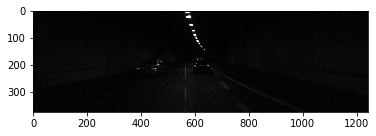

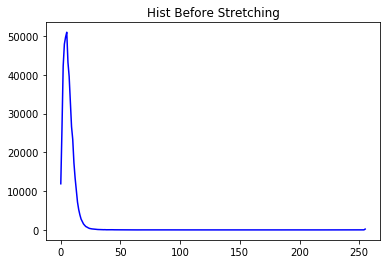

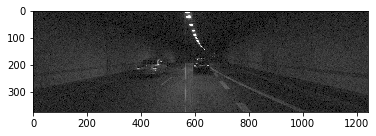

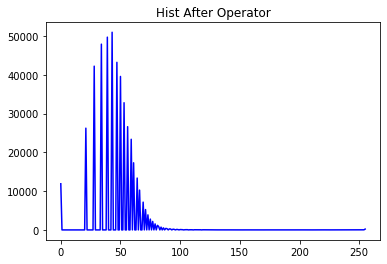

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Reading the image
img = cv2.imread("ex/image.png", cv2.IMREAD_GRAYSCALE)
plt.imshow(img,cmap='gray',vmin=0,vmax=255)
plt.show()

def exponential_operator(img, r):
    exp_img = ((img/255)**r) *255
    return exp_img
    
# Extracting the histogram
hist,bins = np.histogram(img.flatten(),256,[0,256])

# Plotting the histogram before operator
plt.title("Hist Before Stretching")
plt.plot(hist, color = 'b')
plt.show()

exp_img = exponential_operator(img, 0.45)
hist_st,bins = np.histogram(exp_img.astype(np.uint8).flatten(),256,[0,256])
plt.imshow(exp_img,cmap='gray',vmin=0,vmax=255)
plt.show()
plt.title("Hist After Operator")
plt.plot(hist_st, color = 'b')
plt.show()

## Exercise 3: Histogram Equalization
Implement an histogram equalization operator.

Given intesity of pixel $i \in [0 .. 255]$, the image histogram $h$, the total number of pixels of the image $N$, compute the cumulative distribution function:

$PMF(i) = \frac{1}{N}\sum_{k=0}^i(h(k))$

and then use it to perform the equalization:

$P_{out} = 255PMF(P_{in})$

Equalization spreads uniformly pixel intensities across the whole available range, which usually improves the contrast.

Test the function on the __grayscale__ image "ex/image.png".

Plot the histogram of the image before and after the transformation.

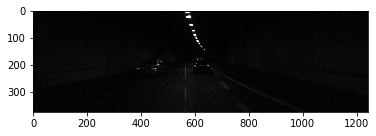

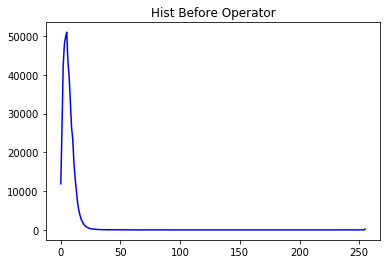

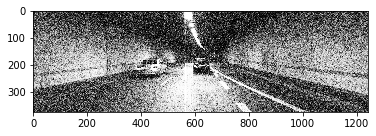

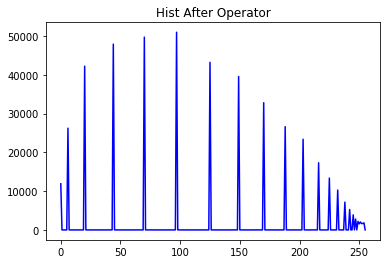

In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def pfm(hist):
    total_pixel = np.sum(hist)
    pfm = []
    for i in range(256):
        pfm_i = np.sum(hist[:i]) / total_pixel
        pfm.append(pfm_i)
    return np.asarray(pfm)

# Reading the image
img = cv2.imread("ex/image.png", cv2.IMREAD_GRAYSCALE)
plt.imshow(img,cmap='gray',vmin=0,vmax=255)
plt.show()

# Extracting the histogram
hist,bins = np.histogram(img.flatten(),256,[0,256])
plt.title("Hist Before Operator")
plt.plot(hist, color = 'b')
plt.show()

# Calculating equalization look up table
eq_op = pfm(hist)*255

# Mapping each pixel value into the equalized one given the pfm
equalized_img = eq_op[img]

# Plotting image
hist_eq,bins = np.histogram(equalized_img.astype(np.uint8).flatten(),256,[0,256])
plt.imshow(equalized_img,cmap='gray',vmin=0,vmax=255)
plt.show()

# Plotting equalized histogram. Pixel intensities are spread across the whole available range.
# Histogram is not perfectly uniform because of the discrete approximations of the pfm.
plt.title("Hist After Operator")
plt.plot(hist_eq, color = 'b')
plt.show()

# Local Operator

## Exercise 4: Mean Filter
Apply a mean filter of kernel size 9x9 to an image.

Test it on the __grayscale__ image "ex/landscape.jpg".

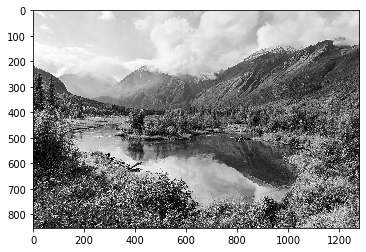

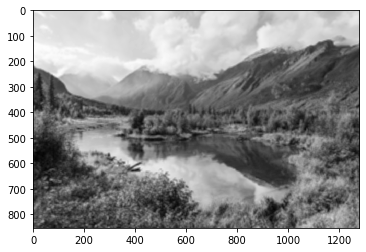

In [5]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Reading the image
img = cv2.imread("ex/landscape.jpg", cv2.IMREAD_GRAYSCALE)
plt.imshow(img,cmap='gray',vmin=0,vmax=255)
plt.show()

k_size = 9
mean_kernel = np.ones([k_size,k_size])/(k_size**2)

img_tr = cv2.filter2D(img,-1,mean_kernel)
plt.imshow(img_tr,cmap='gray',vmin=0,vmax=255)
plt.show()

## Exercise 5: Other Filters
Apply a denoising filter and an high-pass filter (edge-enhancement) to an image.

* Denoising filter = $\begin{bmatrix} 
                        1 & 2 & 1\\
                        2 & 4 & 2\\
                        1 & 2 & 1\\
                        \end{bmatrix}\frac{1}{16} $

* High pass filter (edge-enhancement) = $\begin{bmatrix} 
                        0 & 1 & 0\\
                        1 & -4 & 1\\
                        0 & 1 & 0\\
                        \end{bmatrix}$

Test it on the __grayscale__ image "ex/landscape.jpg".

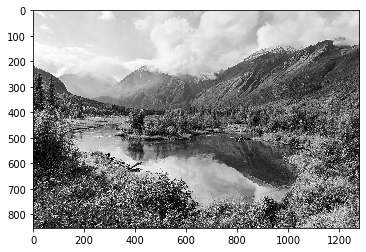

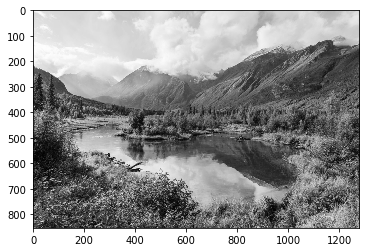

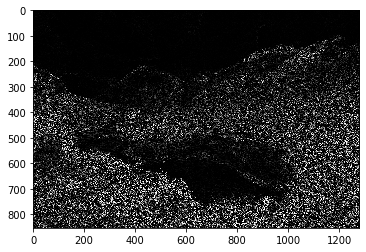

In [6]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Reading the image
img = cv2.imread("ex/landscape.jpg", cv2.IMREAD_GRAYSCALE)
plt.imshow(img,cmap='gray',vmin=0,vmax=255)
plt.show()

denoising_kernel = np.array([
            [1,2,1],
            [2,4,2],
            [1,2,1]])/16

img_tr = cv2.filter2D(img,-1,denoising_kernel)
plt.imshow(img_tr,cmap='gray',vmin=0,vmax=255)
plt.show()

high_pass_kernel = np.array([
            [0,1,0],
            [1,-4,1],
            [0,1,0]])

img_tr = cv2.filter2D(img,-1,high_pass_kernel)
plt.imshow(img_tr,cmap='gray',vmin=0,vmax=255)
plt.show()

## Exercise 6: Gaussian Filter

Apply a gaussian filter with $\sigma=1.5$ to an image.

Do it twice:
* Finding the gaussian kernel and applying it.  
* Using the OpenCV function for gaussian blurring.

Find the kernel size following the rule of thumb showed in the theory slides.

Test it on the __grayscale__ image "ex/landscape.jpg".

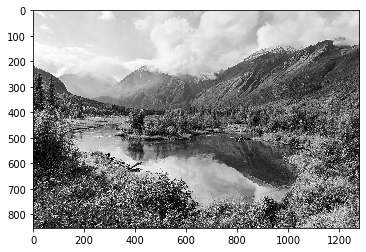

Sigma: 1.5, Kernel Size: 11
Time needed twice 1D:  0.0034699440002441406


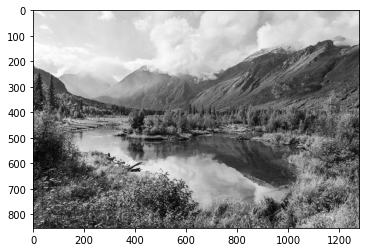

Time needed single 2D (SLOWER):  0.016293048858642578


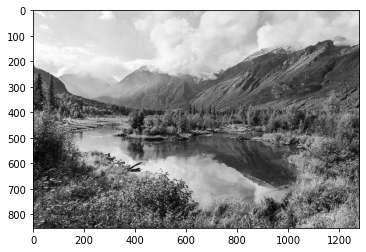

Time needed with OpenCV API (Best Optimization):  0.00185394287109375


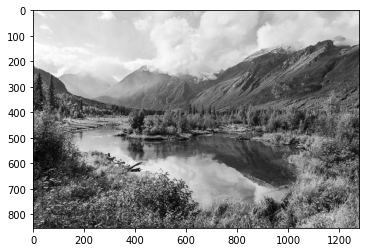

In [7]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import time # Library to compute timings

# Reading the image
img = cv2.imread("ex/landscape.jpg", cv2.IMREAD_GRAYSCALE)
plt.imshow(img,cmap='gray',vmin=0,vmax=255)
plt.show()

# Higher sigmas should correspond to larger kernels. usually big as 
sigma = 1.5
k_size = int(np.ceil((3*sigma))*2 + 1) #rule of thumb for a good kernel size given sigma
print("Sigma: {}, Kernel Size: {}".format(sigma, k_size))

# Finding the gaussian kernel 1D 11x1
gaussian_kernel_1D = cv2.getGaussianKernel(k_size, sigma)

start = time.time()
img_tr1 = cv2.filter2D(img,-1,gaussian_kernel_1D)
img_tr = cv2.filter2D(img_tr1,-1,gaussian_kernel_1D.transpose())
print("Time needed twice 1D: ", time.time()-start)
plt.imshow(img_tr,cmap='gray',vmin=0,vmax=255)
plt.show()

# Finding the gaussian kernel 2D 11x11
gaussian_kernel_2D = gaussian_kernel_1D.dot(gaussian_kernel_1D.transpose())

start = time.time()
# Applying the kernel
img_tr = cv2.filter2D(img,-1,gaussian_kernel_2D)
print("Time needed single 2D (SLOWER): ", time.time()-start)

# Plot the result
plt.imshow(img_tr,cmap='gray',vmin=0,vmax=255)
plt.show()

# Using OpenCV function GaussianBlur
start = time.time()
img_tr = cv2.GaussianBlur(img, (k_size,k_size) , sigma)
print("Time needed with OpenCV API (Best Optimization): ", time.time()-start)
# Plot the result
plt.imshow(img_tr,cmap='gray',vmin=0,vmax=255)
plt.show()

## Exercise 7: Bilateral Filter
Apply a bilateral filter with filter size of 9x9 and both sigma values of 75. 

Test it on the __grayscale__ image "ex/landscape.jpg".

__N.B__:
* Sigma values: If they are small (< 10), the filter will not have much effect, whereas if they are large (> 150), they will have a very strong effect, making the image look “cartoonish”.
* Filter size: Large filters (> 5) are very slow, so it is recommended to use d=5 for real-time applications, and approximately 9 for offline applications that need heavy noise filtering.

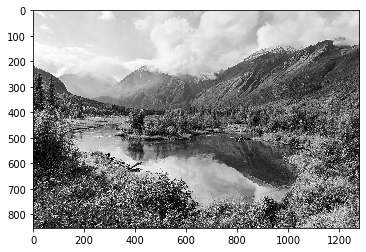

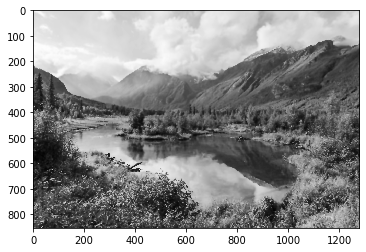

In [8]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Reading the image
img = cv2.imread("ex/landscape.jpg", cv2.IMREAD_GRAYSCALE)
plt.imshow(img,cmap='gray',vmin=0,vmax=255)
plt.show()

img_bilateral = cv2.bilateralFilter(img,9,75,75)
# Plot the result
plt.imshow(img_bilateral,cmap='gray',vmin=0,vmax=255)
plt.show()

## Exercise 8: Sobel Filter
Apply the Sobel kernels to calculate the smooth derivates $\frac{dI(x, y)}{dx}$, $\frac{dI(x, y)}{dy}$ along x and y respectively. Visualize the absolute value of the two results.

Then, calculate the module of the gradient as $max(abs(\frac{dI(x, y)}{dx}, \frac{dI(x, y)}{dy}))$ and visualize also this last result.

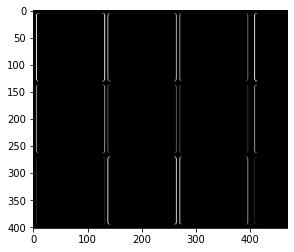

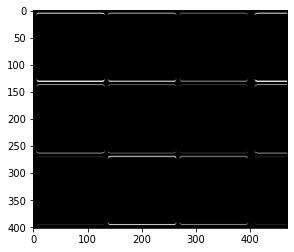

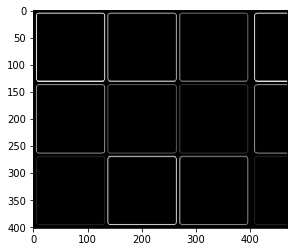

In [9]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread("ex/squares.png",cv2.IMREAD_GRAYSCALE)

# Defining sobel kernels
sobel_kernel_x = np.array([
            [-1,0,1],
            [-2,0,2],
            [-1,0,1]])*1/4

sobel_kernel_y = np.array([
            [-1,-2,-1],
            [0,0,0],
            [1,2,1]])*1/4

# Finding dI(x, y)/dx
dx = cv2.filter2D(img.astype(float),-1,sobel_kernel_x)
dx = np.abs(dx)
plt.imshow(dx,cmap='gray',vmin=0,vmax=255)
plt.show()

# Finding dI(x, y)/dy
dy = cv2.filter2D(img.astype(float),-1,sobel_kernel_y)
dy = np.abs(dy)
plt.imshow(dy,cmap='gray',vmin=0,vmax=255)
plt.show()

# Finding gradient module pixel-wise
sobel = np.maximum(dx,dy)
plt.imshow(sobel,cmap='gray',vmin=0,vmax=255)
plt.show()